In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = pd.read_csv("ENB2012_data.csv")

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", 
                "Roof_Area", "Overall_Height","Orientation", "Glazing_Area",
                "Glazing_Area_Distribution", "Heating_Load","Cooling_Load"] 

In [5]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

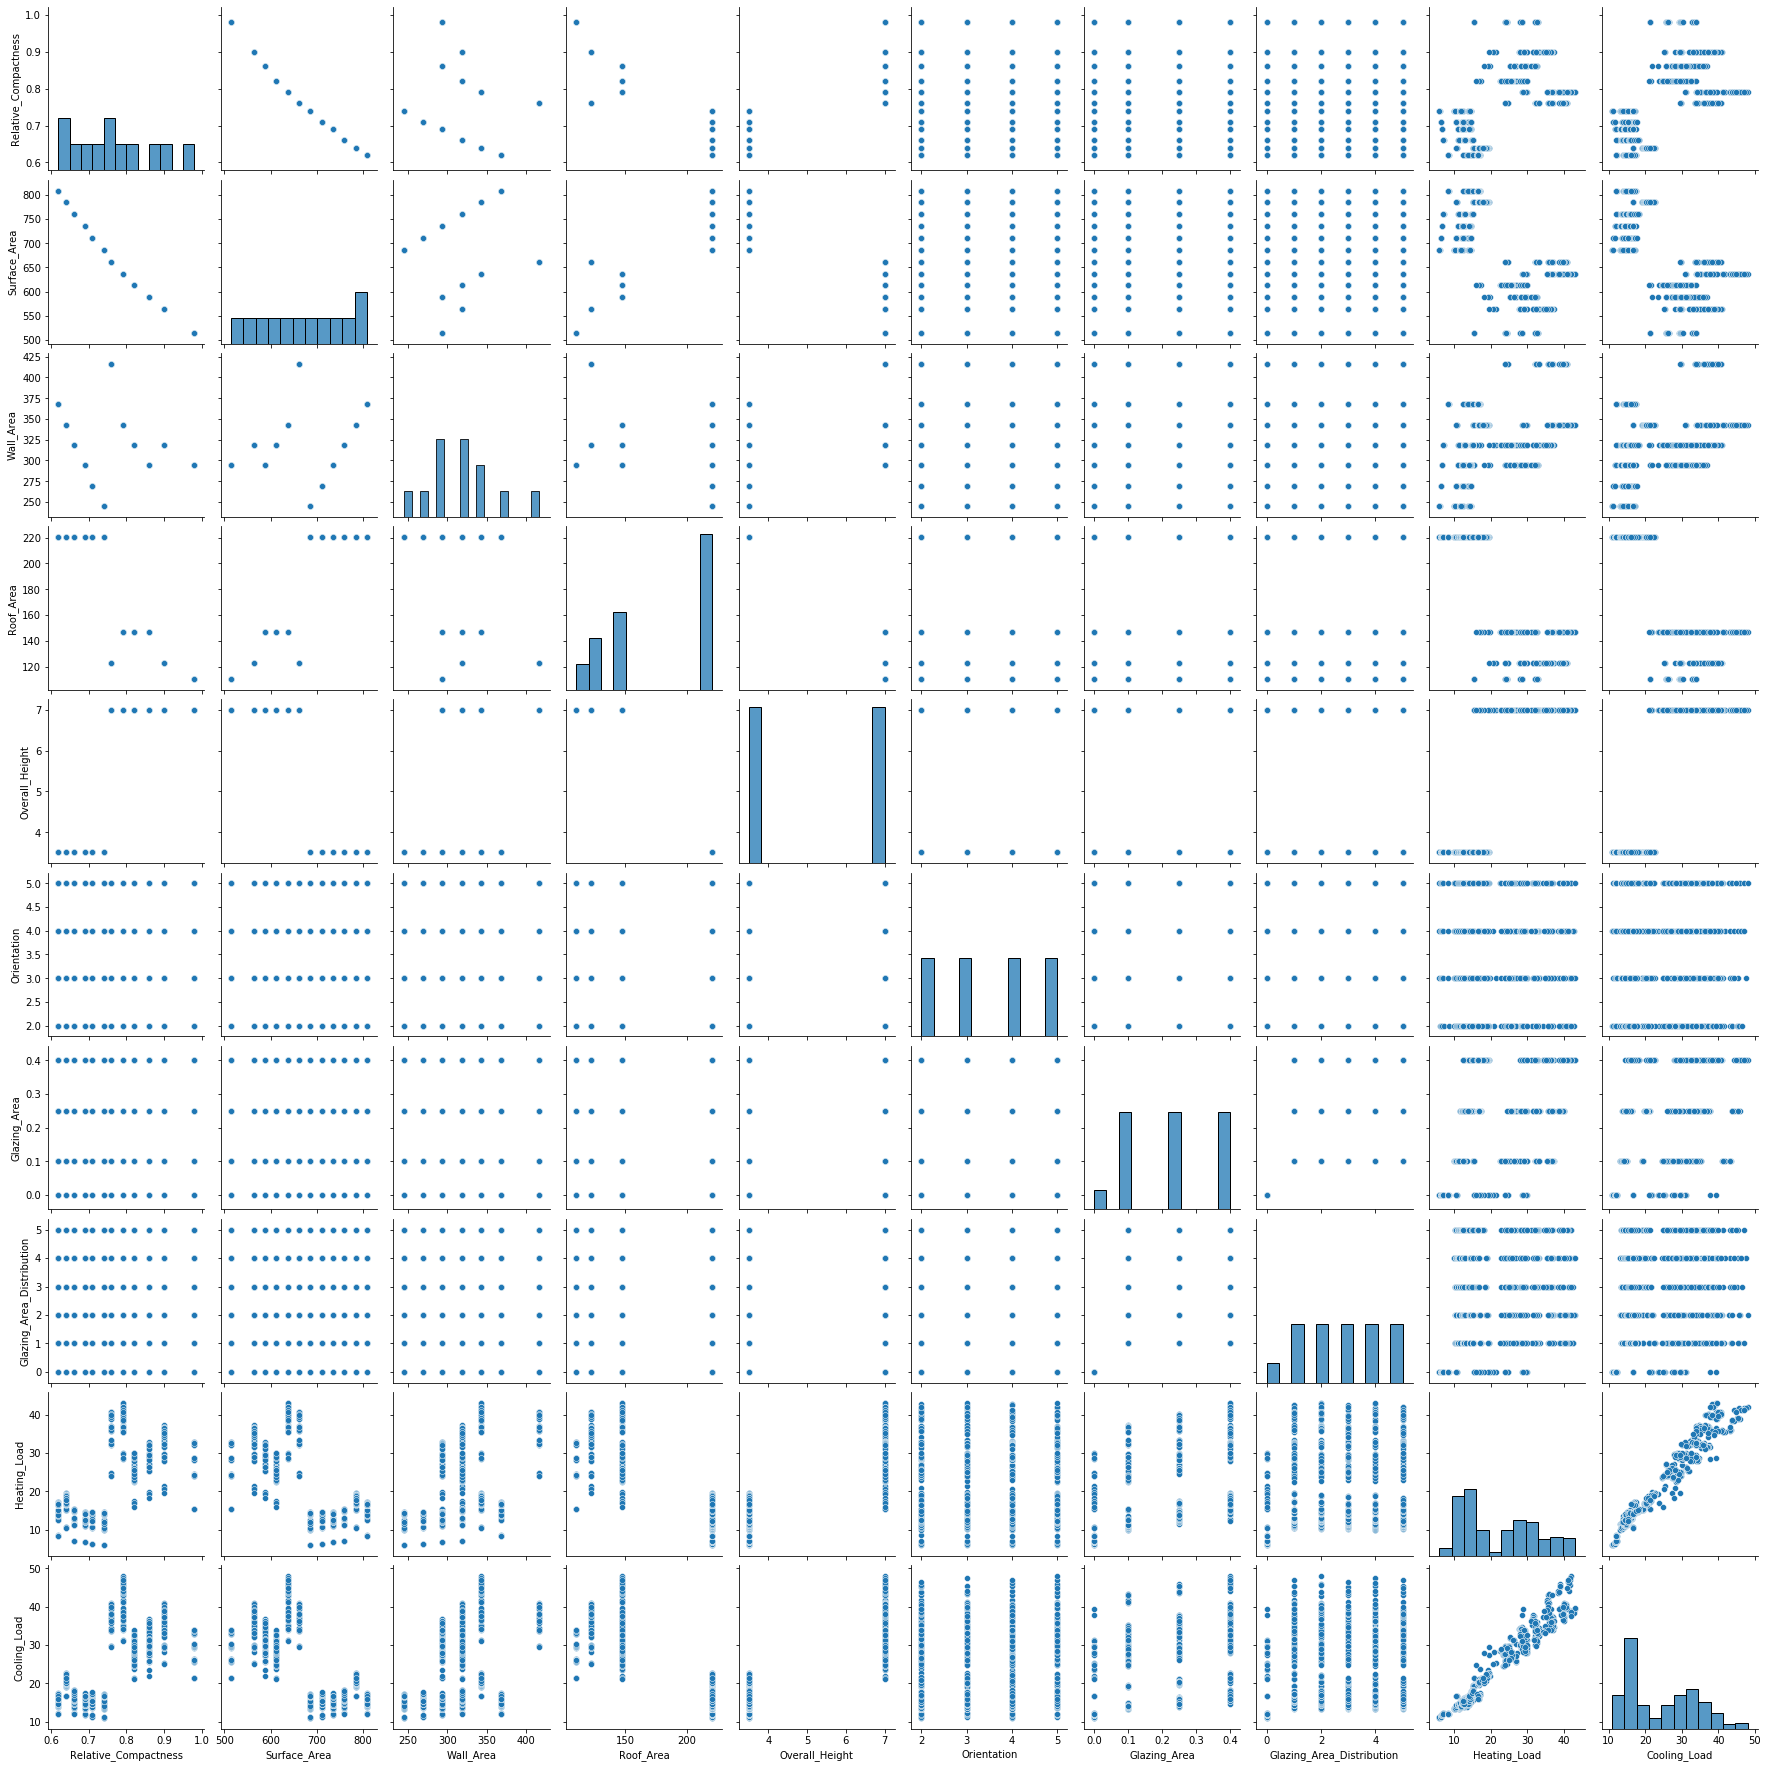

In [9]:
sns.pairplot(data)

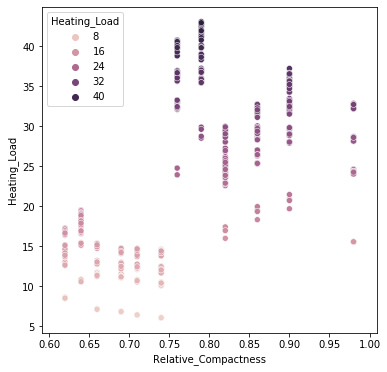

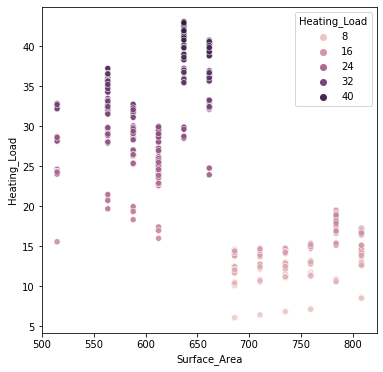

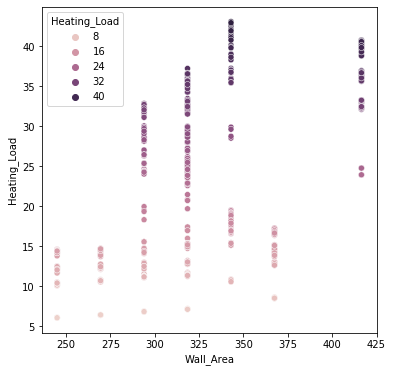

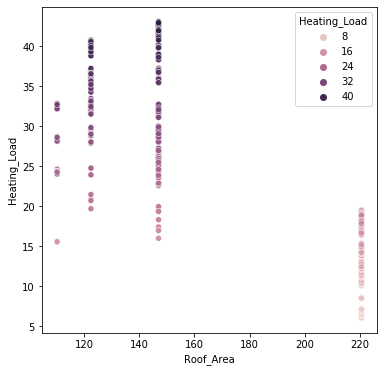

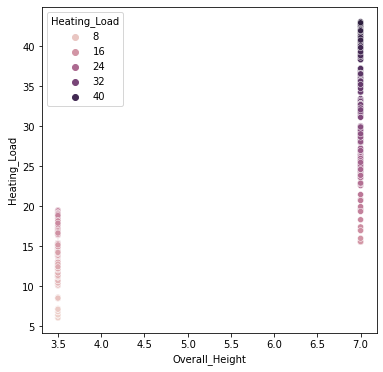

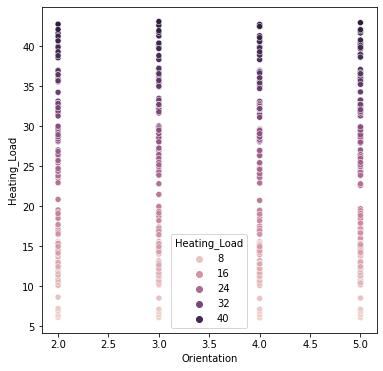

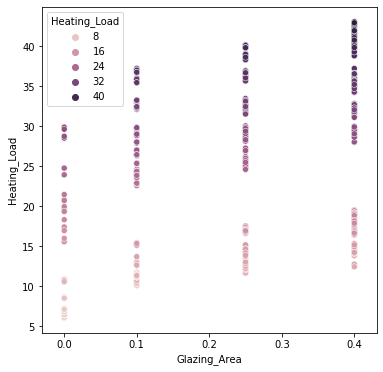

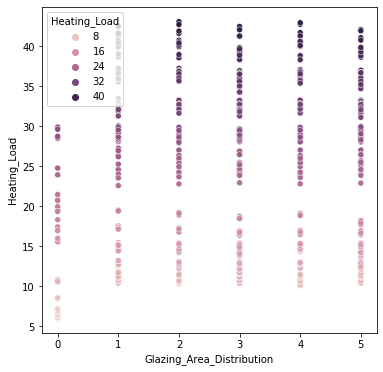

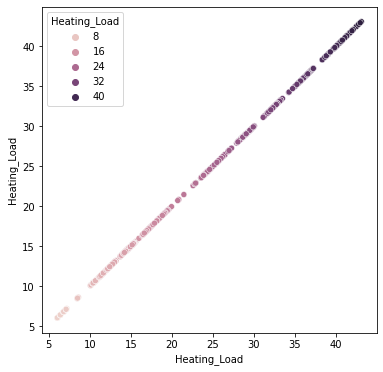

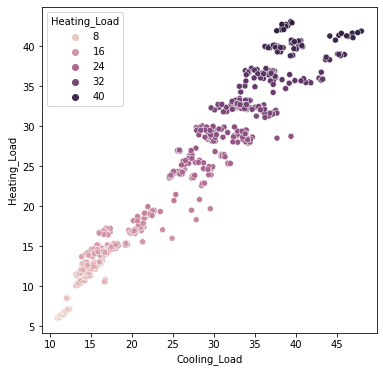

In [10]:
for i in data:  
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=data[i],y=data['Heating_Load'],hue=data['Heating_Load'])
    plt.xlabel(i)
    plt.ylabel('Heating_Load')
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 360x360 with 0 Axes>

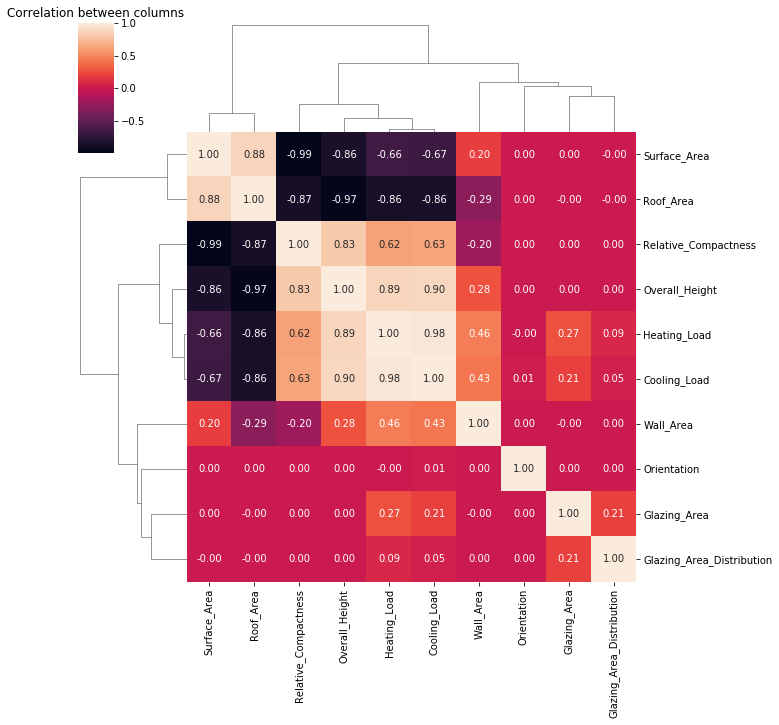

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(5,5))
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between columns")
plt.show

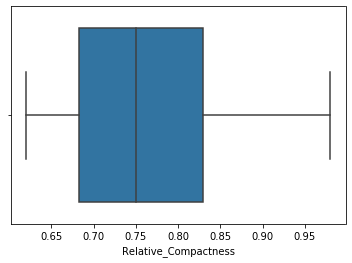

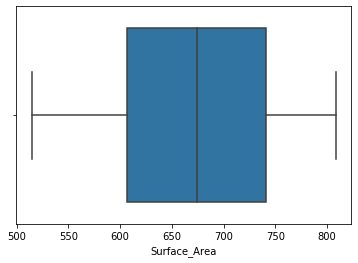

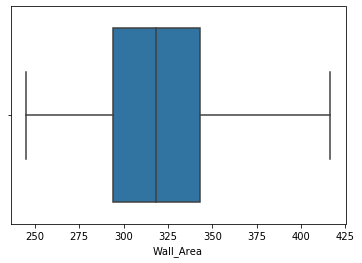

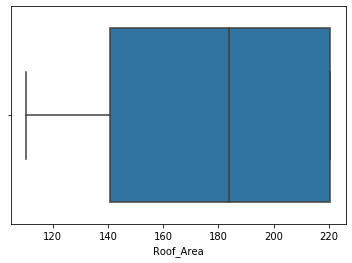

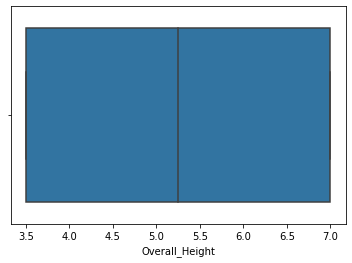

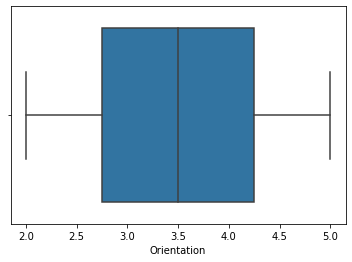

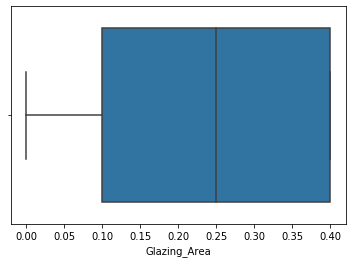

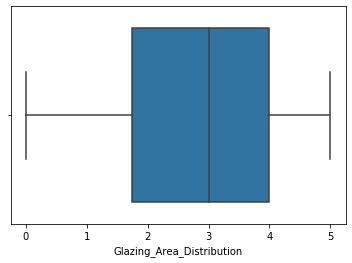

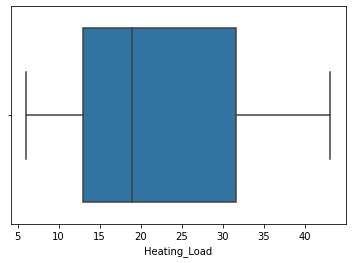

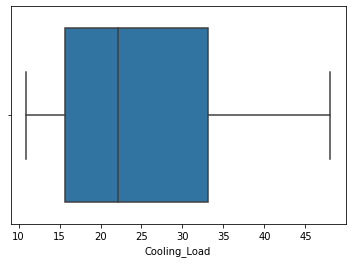

In [12]:
for c in data:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "x")

cat_col = ["Relative_Compactness","Surface_Area","Wall_Area","Roof_Area",
           "Overall_Height","Orientation","Glazing_Area","Glazing_Area_Distribution"]
data = pd.get_dummies(data, columns = cat_col)

In [13]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Text(0.5, 1, 'Correlation Between Features w Corr Treshold 0.50')

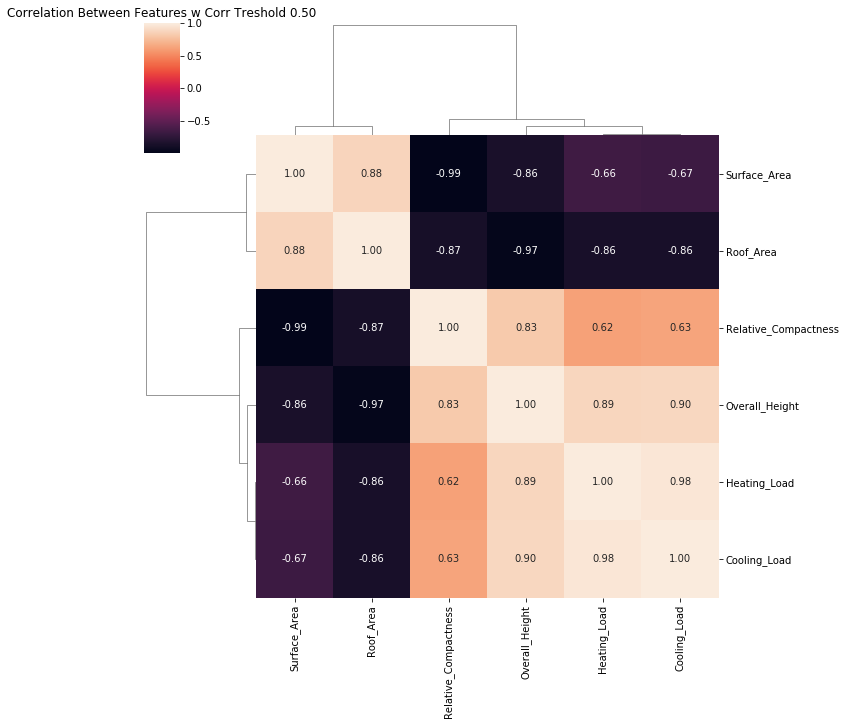

In [14]:
threshold = 0.50
filtre = np.abs(corr_matrix["Heating_Load"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot = True, fmt =".2f")
plt.title("Correlation Between Features w Corr Treshold 0.50")

In [15]:
data = data.drop(["Cooling_Load"], axis = 1)

In [16]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [17]:
x = data.drop(["Heating_Load"],axis = 1)
y = data.Heating_Load

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor()

In [22]:
model.fit(x_train, y_train)

/home/faruk/.pyenv/versions/3.7.5/envs/optiwisdom/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_train_pred = model.predict(x_train)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [26]:
r2_train = r2_score(y_train, y_train_pred)
print("Random Forest Regressor Train Score",r2_train)
r2_test = r2_score(y_test, y_pred)
print("Random Forest Regressor Test Score",r2_test)

Random Forest Regressor Train Score 0.9994381222046077
Random Forest Regressor Test Score 0.996462919095113


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
import math
rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regressor Train Score",rmse_train)
print("Random Forest Regressor Test Score",rmse_test)

Random Forest Regressor Train Score 0.23633259978231913
Random Forest Regressor Test Score 0.6249693239225076


In [29]:
parametresGrid ={'bootstrap': [True, False],
                 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
model_tuned = GridSearchCV(model, parametresGrid, cv = 10, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = -1, verbose = 2)

In [31]:
model_tuned.fit(x_train, y_train)

Fitting 10 folds for each of 3960 candidates, totalling 39600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 98.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             v...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_dep

In [32]:
model_tuned.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
model_tuned_y_pred = model_tuned.predict(x_test)

In [34]:
model_tuned_y_train_pred = model_tuned.predict(x_train)

In [35]:
rmse_train = math.sqrt(mean_squared_error(y_train, model_tuned_y_train_pred))
rmse_test = math.sqrt(mean_squared_error(y_test, model_tuned_y_pred))
print("Random Forest Regressor Train Score",rmse_train)
print("Random Forest Regressor Test Score",rmse_test)

Random Forest Regressor Train Score 0.17598765345999554
Random Forest Regressor Test Score 0.5766104989910646
